In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[:5])


[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 [0.61719384]
 [0.61820762]]


In [24]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1975, 60)
(1975,)


In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(1975, 60, 1)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN

regressor = Sequential()

regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(SimpleRNN(units = 50, return_sequences = False))
# Adding the output layers
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)




Epoch 1/100
62/62 [==============================] - 3s 20ms/step - loss: 0.0102
Epoch 2/100
62/62 [==============================] - 1s 20ms/step - loss: 8.1586e-04
Epoch 3/100
62/62 [==============================] - 1s 20ms/step - loss: 5.0006e-04
Epoch 4/100
62/62 [==============================] - 1s 22ms/step - loss: 4.1251e-04
Epoch 5/100
62/62 [==============================] - 1s 22ms/step - loss: 3.5887e-04
Epoch 6/100
62/62 [==============================] - 1s 21ms/step - loss: 3.7273e-04
Epoch 7/100
62/62 [==============================] - 1s 20ms/step - loss: 3.2328e-04
Epoch 8/100
62/62 [==============================] - 1s 22ms/step - loss: 3.1257e-04
Epoch 9/100
62/62 [==============================] - 1s 22ms/step - loss: 3.8572e-04
Epoch 10/100
62/62 [==============================] - 1s 21ms/step - loss: 3.4396e-04
Epoch 11/100
62/62 [==============================] - 1s 21ms/step - loss: 3.0417e-04
Epoch 12/100
62/62 [==============================] - 1s 21ms/step 

In [27]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
    

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(inputs.shape)
    

(76, 1)


In [29]:
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(16, 60)
(16, 60, 1)


In [30]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)
    

(16, 1)


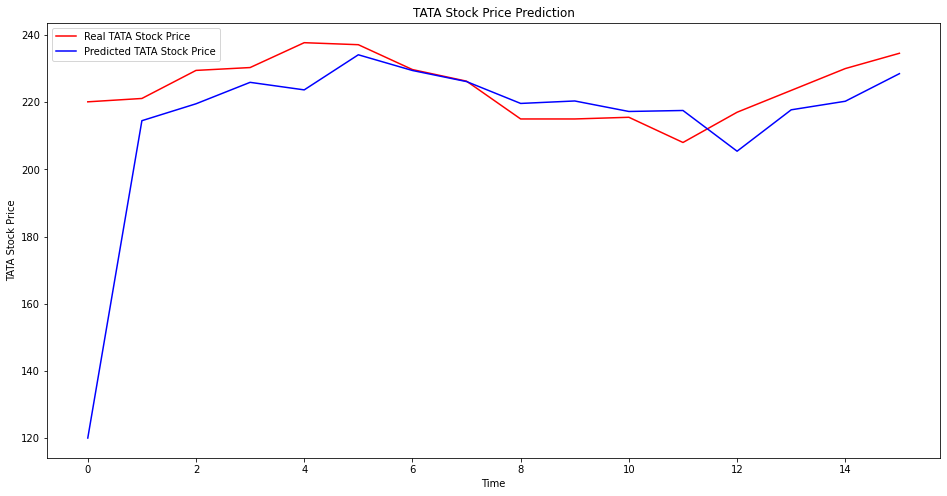

In [33]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()